# Analysis of the 'hotter is better' pattern in arthropod traits

In [106]:
######## Analysis of the 'hotter is better' pattern in arthropod traits #########

# Load libraries
require(tidyverse)
require(cowplot)

In [107]:
speciesmass <- as_tibble(read_csv('../data/TraitData.csv')) %>%
  select(originaltraitname, originaltraitvalue, interactor1) %>%
  filter(originaltraitname == 'body size' & originaltraitvalue != 'NA')
      
sizeMeans <- 
  speciesmass %>% 
  group_by(interactor1) %>% 
  summarise(avg = mean(originaltraitvalue), sd = sd(originaltraitvalue)) %>%
  arrange(avg)

head(sizeMeans)

write_csv(sizeMeans, '../data/sizeMeans.csv')

# # plot means to get idea of size variation across species 
# sizeMeans %>%
#   mutate(interactor1 = fct_reorder(interactor1,avg)) %>%
#   arrange(avg) %>%
#   ggplot(aes(x=avg, y=interactor1, colour = interactor1))+
#   geom_point()


── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  originaltraitvalue = col_double(),
  originalerrorpos = col_double(),
  originalerrorneg = col_double(),
  standardisedtraitvalue = col_double(),
  latitude = col_double(),
  longitude = col_double()
)
ℹ Use `spec()` for the full column specifications.




interactor1,avg,sd
<chr>,<dbl>,<dbl>
Amblyseius womersleyi,0.005060000,0.0004733286
Amblyseius swirskii,0.005842105,0.0007951770
Kampimodromus aberrans,0.009100000,NA
Tetranychus evansi,0.024300000,0.0002828427
Tetranychus mcdanieli,0.024300000,0.0002828427
Tetranychus urticae,0.024300000,0.0002828427


## Development time ($\alpha$)

In [108]:
#±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±

# 1. Development time (a)

bodyMass <- sizeMeans %>% 
  rename(species = interactor1) %>%
  mutate(curve_ID = case_when(species == 'Aedes albopictus' ~ '1',
                              species == 'Aedes aegypti' ~ '2',
                              species == 'Anthonomus grandis' ~ '3',
                              species == 'Paracoccus marginatus' ~ '4',
                              species == 'Acyrthosiphon pisum' ~ '5',
                              species == 'Aphis gossypii' ~ '6',
                              species == 'Harmonia axyridis' ~ '7',
                              species == 'Tribolium castaneum' ~ '8',
                              species == 'Aedes krombeini' ~ '9',
                              species == 'Bemisia tabaci' ~ '10',
                              species == 'Tetraneura nigriabdominalis' ~ '11',
                              species == 'Stethorus punctillum' ~ '12',
                              species == 'Tetranychus mcdanieli' ~ '13',
                              species == 'Tetranychus urticae' ~ '14',
                              species == 'Clavigralla tomentosicollis' ~ '15',
                              species == 'Planococcus citri' ~ '16',
                              species == 'Muscidifurax zaraptor' ~ '17',
                              species == 'Aphis nasturtii' ~ '18',
                              species == 'Rhopalosiphum maidis' ~ '19',
                              species == 'Anopheles gambiae' ~ '20',
                              species == 'Anoplophora glabripennis' ~ '21',
                              species == 'Amblyseius womersleyi' ~ '22',
                              species == 'Trichogramma sp. nr. Lutea' ~ '23',
                              species == 'Trichogramma bruni' ~ '24',
                              species == 'Culex annulirostris' ~ '25',
                              species == 'Macrocentrus iridescens' ~ '26',
                              species == 'Otiorhynchus sulcatus' ~ '27',
                              species == 'Drosophila suzukii' ~ '28',
                              species == 'Gastrolina depressa' ~ '29',
                              species == 'Laricobius nigrinus' ~ '30',
                              species == 'Aubeonymus mariaefranciscae' ~ '31',
                              species == 'Iphiseius degenerans' ~ '32',
                              species == 'Amblyseius swirskii' ~ '33',
                              species == 'Macrosiphum euphorbia' ~ '34',
                              species == 'Myzus persicae' ~ '35',
                              species == 'Tetranychus evansi' ~ '36',
                              species == 'Helicoverpa armigera' ~ '37',
                              species == 'Antestiopsis thunbergii' ~ '38',
                              species == 'Monochamus leuconotus' ~ '39',
                              species == 'Kampimodromus aberrans' ~ '40',
                              species == 'Phenacoccus solenopsis' ~ '41',
                              species == 'Leptinotarsa decemlineata' ~ '42',
                              species == 'Halyomorpha halys' ~ '43',
                              species == 'Muscidifurax raptorellus' ~ '44',
                              species == 'Thrips hawaiiensis' ~ '45')) %>%
  arrange(curve_ID) %>% 
  rename(massspecies = species, masscurve_ID = curve_ID) %>% 
  filter(masscurve_ID != 'NA')

In [109]:
head(bodyMass)

massspecies,avg,sd,masscurve_ID
<chr>,<dbl>,<dbl>,<chr>
Aedes albopictus,2.202857,0.5610916231,1
Bemisia tabaci,0.293125,0.0298445377,10
Tetraneura nigriabdominalis,0.867300,0.3252394195,11
Stethorus punctillum,0.480000,0.0424264069,12
Tetranychus mcdanieli,0.024300,0.0002828427,13
Tetranychus urticae,0.024300,0.0002828427,14


In [110]:
Tc <- as_tibble(read.csv('../data/alpha_Tpks_AllParams.csv')) %>%
  mutate(curve_ID = case_when(species == 'Aedes albopictus' ~ '1',
                              species == 'Aedes aegypti' ~ '2',
                              species == 'Anthonomus grandis' ~ '3',
                              species == 'Paracoccus marginatus' ~ '4',
                              species == 'Acyrthosiphon pisum' ~ '5',
                              species == 'Aphis gossypii' ~ '6',
                              species == 'Harmonia axyridis' ~ '7',
                              species == 'Tribolium castaneum' ~ '8',
                              species == 'Aedes krombeini' ~ '9',
                              species == 'Bemisia tabaci' ~ '10',
                              species == 'Tetraneura nigriabdominalis' ~ '11',
                              species == 'Stethorus punctillum' ~ '12',
                              species == 'Tetranychus mcdanieli' ~ '13',
                              species == 'Tetranychus urticae' ~ '14',
                              species == 'Clavigralla tomentosicollis' ~ '15',
                              species == 'Planococcus citri' ~ '16',
                              species == 'Muscidifurax zaraptor' ~ '17',
                              species == 'Aphis nasturtii' ~ '18',
                              species == 'Rhopalosiphum maidis' ~ '19',
                              species == 'Anopheles gambiae' ~ '20',
                              species == 'Anoplophora glabripennis' ~ '21',
                              species == 'Amblyseius womersleyi' ~ '22',
                              species == 'Trichogramma sp. nr. Lutea' ~ '23',
                              species == 'Trichogramma bruni' ~ '24',
                              species == 'Culex annulirostris' ~ '25',
                              species == 'Macrocentrus iridescens' ~ '26',
                              species == 'Otiorhynchus sulcatus' ~ '27',
                              species == 'Drosophila suzukii' ~ '28',
                              species == 'Gastrolina depressa' ~ '29',
                              species == 'Laricobius nigrinus' ~ '30',
                              species == 'Aubeonymus mariaefranciscae' ~ '31',
                              species == 'Iphiseius degenerans' ~ '32',
                              species == 'Amblyseius swirskii' ~ '33',
                              species == 'Macrosiphum euphorbia' ~ '34',
                              species == 'Myzus persicae' ~ '35',
                              species == 'Tetranychus evansi' ~ '36',
                              species == 'Helicoverpa armigera' ~ '37',
                              species == 'Antestiopsis thunbergii' ~ '38',
                              species == 'Monochamus leuconotus' ~ '39',
                              species == 'Kampimodromus aberrans' ~ '40',
                              species == 'Phenacoccus solenopsis' ~ '41',
                              species == 'Leptinotarsa decemlineata' ~ '42',
                              species == 'Halyomorpha halys' ~ '43',
                              species == 'Muscidifurax raptorellus' ~ '44',
                              species == 'Thrips hawaiiensis' ~ '45')) %>%
  
  arrange(curve_ID) 

In [111]:
head(Tc)

X,param,conf_lower,conf_upper,method,estimate,species,trait,curve_ID
<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,rmax,0.1151097,0.1778926,residual bootstrap,0.1309269,Aedes albopictus,juvenile development rate,1
2,topt,29.6064590,33.5472147,residual bootstrap,31.1600000,Aedes albopictus,juvenile development rate,1
3,ctmin,-5.9090000,8.5498799,residual bootstrap,4.2840000,Aedes albopictus,juvenile development rate,1
4,ctmax,36.0387370,45.9678976,residual bootstrap,41.1210000,Aedes albopictus,juvenile development rate,1
5,thermal_safety_margin,2.5949407,15.4696221,residual bootstrap,9.9610000,Aedes albopictus,juvenile development rate,1
6,thermal_tolerance,32.3696876,43.2340000,residual bootstrap,36.8370000,Aedes albopictus,juvenile development rate,1


In [112]:
# Extract just a data 
a_pk <- Tc %>% filter(param == 'rmax') %>% 
        rename(a_pk = estimate, a_pkLwr = conf_lower,a_pkUpr = conf_upper) %>% 
        select(a_pk, a_pkLwr, a_pkUpr, species, curve_ID)

T_pk <- Tc %>% filter(param == 'topt') %>% 
  rename(T_pk = estimate, T_pkLwr = conf_lower,T_pkUpr = conf_upper) %>% 
  select(T_pk, T_pkLwr, T_pkUpr)

In [113]:
head(a_pk)

a_pk,a_pkLwr,a_pkUpr,species,curve_ID
<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.13092688,0.11510974,0.1778926,Aedes albopictus,1
0.08282502,0.07852546,0.0947177,Bemisia tabaci,10
0.11794938,0.11691498,0.1186798,Tetraneura nigriabdominalis,11
0.15281755,0.14378690,0.1648428,Stethorus punctillum,12
0.35107259,0.31324326,0.3800155,Tetranychus mcdanieli,13
0.16981269,0.14844946,0.1904718,Tetranychus urticae,14


In [114]:
head(T_pk)

T_pk,T_pkLwr,T_pkUpr
<dbl>,<dbl>,<dbl>
31.160,29.60646,33.54721
29.751,29.39564,30.66724
30.648,30.53870,30.77909
32.875,32.77700,33.02696
35.182,34.95749,35.79866
31.467,29.82888,33.46901


In [115]:
bodyMass <- bodyMass %>% select(avg, masscurve_ID)

Tc <- bind_cols(a_pk, T_pk, bodyMass)

Tc <- Tc %>% rename(mass = avg) %>% select(-masscurve_ID)

write_csv(Tc, '../data/a_pksT_pksMass.csv')


Call:
lm(formula = log(a_pk) ~ T_pk, data = Tc)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1968 -0.2331  0.1534  0.5666  1.8411 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.82553    1.32270  -4.404 6.93e-05 ***
T_pk         0.11564    0.04361   2.652   0.0112 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.036 on 43 degrees of freedom
Multiple R-squared:  0.1405,	Adjusted R-squared:  0.1205 
F-statistic: 7.031 on 1 and 43 DF,  p-value: 0.01117


`geom_smooth()` using formula 'y ~ x'



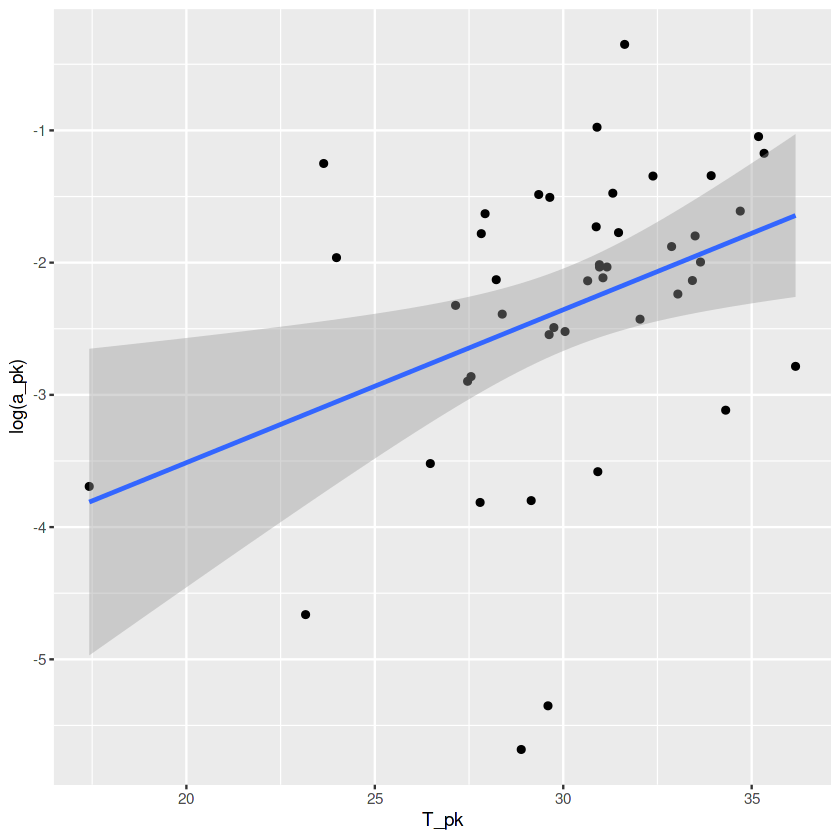

In [116]:
# fit linear model (note that alpha_pk is linear in log-log scale)
TcLm <- lm(log(a_pk) ~ T_pk, data = Tc); summary(TcLm)

Tc %>%
  ggplot(aes(x=T_pk,y = log(a_pk)))+
  geom_point()+
  geom_smooth(method = 'lm')

In [117]:
a_data <- as_tibble(read.csv('../data/a_pksT_pksMass.csv')) # load in data 
a_data$kT <- 1/(8.617333262145 * 10^-5 * (a_data$T_pk+273.15))
head(a_data)

a_pk,a_pkLwr,a_pkUpr,species,curve_ID,T_pk,T_pkLwr,T_pkUpr,mass,kT
<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.13092688,0.11510974,0.1778926,Aedes albopictus,1,31.160,29.60646,33.54721,2.202857,38.13387
0.08282502,0.07852546,0.0947177,Bemisia tabaci,10,29.751,29.39564,30.66724,0.293125,38.31126
0.11794938,0.11691498,0.1186798,Tetraneura nigriabdominalis,11,30.648,30.53870,30.77909,0.867300,38.19814
0.15281755,0.14378690,0.1648428,Stethorus punctillum,12,32.875,32.77700,33.02696,0.480000,37.92016
0.35107259,0.31324326,0.3800155,Tetranychus mcdanieli,13,35.182,34.95749,35.79866,0.024300,37.63644
0.16981269,0.14844946,0.1904718,Tetranychus urticae,14,31.467,29.82888,33.46901,0.024300,38.09544


`geom_smooth()` using formula 'y ~ x'



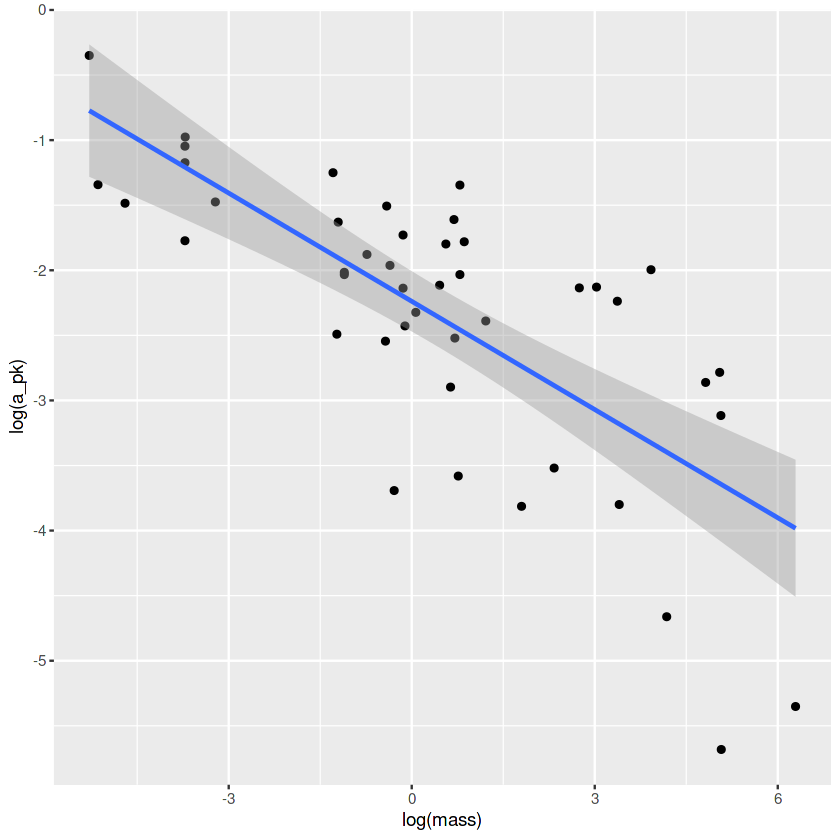

In [118]:
#plot uncorrected data in log-log scale
a_data %>%
  ggplot(aes(x=log(mass), y = log(a_pk)))+
  geom_point()+
  geom_smooth(method = 'lm')

`geom_smooth()` using formula 'y ~ x'



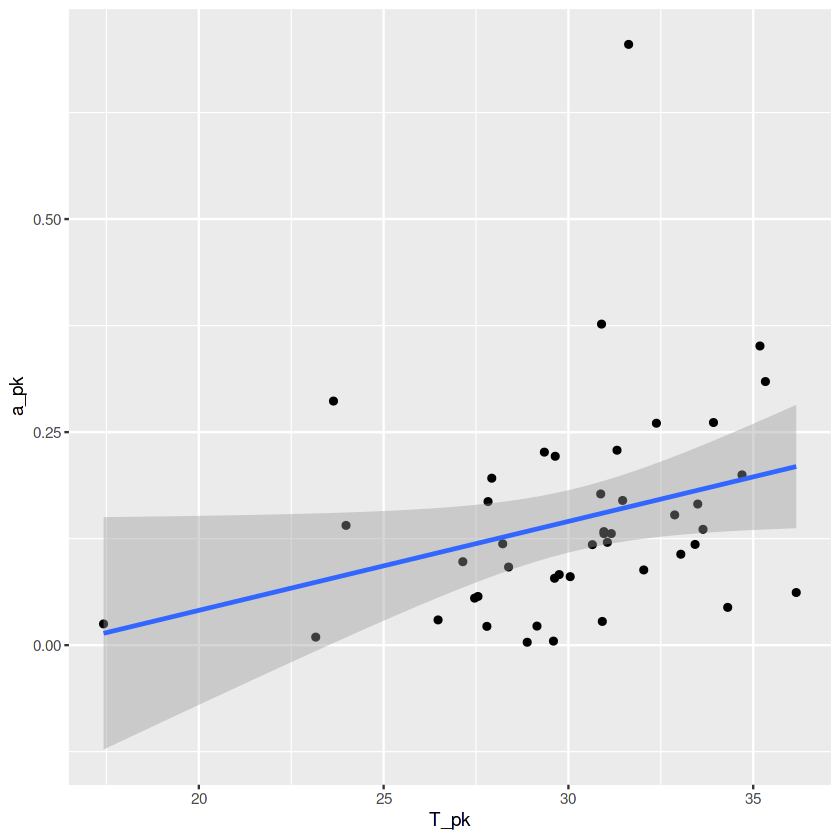

In [119]:
#plot a_pk vs Tpk
a_data %>%
  ggplot(aes(x = T_pk, y = a_pk)) +
  geom_point()+
  geom_smooth(method = 'lm')

In [120]:
# linear model (note the allometry is linear in log-log scale)
a_model <- lm(log(a_pk) ~ log(mass) + kT, data = a_data)
summary(a_model)
coef(a_model)
save(a_model,file="../results/a_MTE_model.Rdata")


Call:
lm(formula = log(a_pk) ~ log(mass) + kT, data = a_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.98033 -0.39466  0.01484  0.40234  1.25894 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25.84793    8.79686   2.938  0.00534 ** 
log(mass)   -0.26563    0.03625  -7.327 4.97e-09 ***
kT          -0.73402    0.22988  -3.193  0.00267 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6946 on 42 degrees of freedom
Multiple R-squared:  0.6225,	Adjusted R-squared:  0.6045 
F-statistic: 34.62 on 2 and 42 DF,  p-value: 1.307e-09


(Intercept)   log(mass)          kT 
 25.8479330  -0.2656339  -0.7340173

In [121]:
a_cf <-  confint(a_model,level = .95)
anova(a_model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(mass),1,28.49338,28.4933752,59.05127,1.550515e-09
kT,1,4.91941,4.9194098,10.19526,2.668243e-03
Residuals,42,20.26581,0.4825193,NA,NA


In [122]:
coef(a_model)[2]

log(mass) 
-0.2656339

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


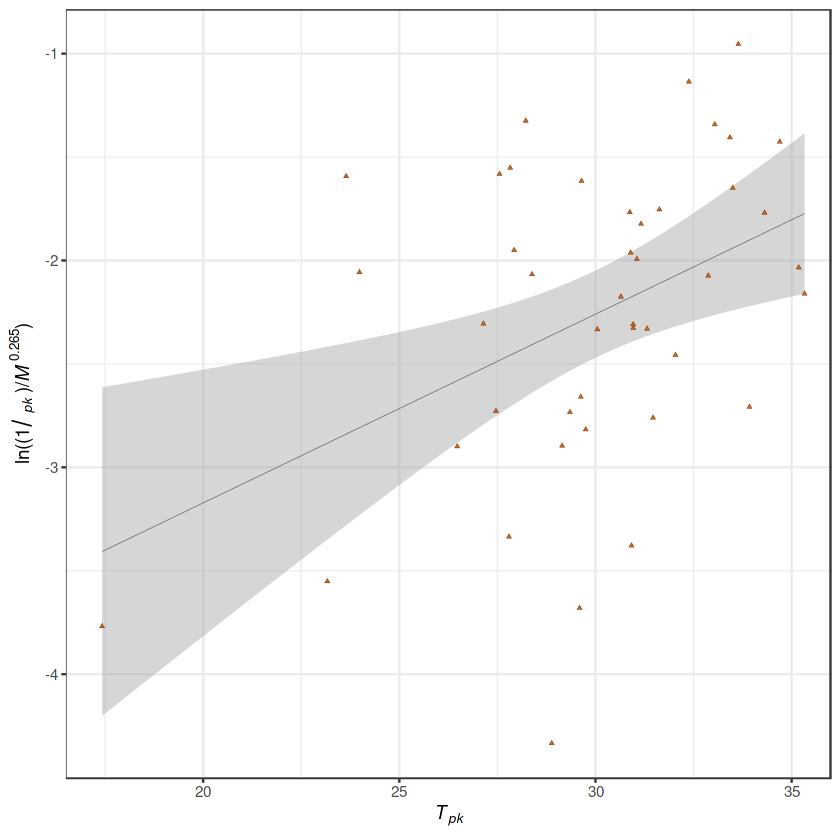

In [123]:
#plot a_pk in 1/kT, correcting for mass
MassCorrectedApkTpk <- a_data %>%
  ggplot(aes(x = T_pk, y = log(a_pk/mass^coef(a_model)[2]))) +
  geom_smooth(method = 'lm', colour = '#636363', size=0.15) +
  scale_y_continuous(expression(plain(paste("ln((", italic(1/alpha[pk])~")/",italic(M^-0.265),")"))))+
  scale_x_continuous(expression(plain(paste(italic("T"[pk])))),
                     limits =c(16.5,36),
                     expand = c(0, 0),
                     breaks=seq(20,35, by=5))+
  theme_bw() +
  geom_point(size = 1, col="#000000",stroke=0.1, shape = 24, fill="#e66101")

MassCorrectedApkTpk

## Peak fecundity ($b_{max}$)

In [124]:
#===============================================================

# 4. Peak fecundity (bmax)

bodyMass <- as_tibble(read.csv('../data/sizeMeans.csv')) %>% 
  rename(species = interactor1) %>% 
  mutate(curve_ID = case_when(species == 'Aedes aegypti' ~ '2',
                              species == 'Anthonomus grandis' ~ '3',
                              species == 'Paracoccus marginatus' ~ '4',
                              species == 'Acyrthosiphon pisum' ~ '5',
                              species == 'Aphis gossypii' ~ '6',
                              species == 'Aedes krombeini' ~ '9',
                              species == 'Bemisia tabaci' ~ '10',
                              species == 'Tetraneura nigriabdominalis' ~ '11',
                              species == 'Stethorus punctillum' ~ '12',
                              species == 'Tetranychus mcdanieli' ~ '13',
                              species == 'Clavigralla tomentosicollis' ~ '15',
                              species == 'Planococcus citri' ~ '16',
                              species == 'Muscidifurax zaraptor' ~ '17',
                              species == 'Aphis nasturtii' ~ '18',
                              species == 'Rhopalosiphum maidis' ~ '19',
                              species == 'Anoplophora glabripennis' ~ '21',
                              species == 'Amblyseius womersleyi' ~ '22',
                              species == 'Trichogramma sp. nr. Lutea' ~ '23',
                              species == 'Trichogramma bruni' ~ '24',
                              species == 'Drosophila suzukii' ~ '28',
                              species == 'Iphiseius degenerans' ~ '32',
                              species == 'Tetranychus evansi' ~ '36',
                              species == 'Helicoverpa armigera' ~ '37',
                              species == 'Antestiopsis thunbergii' ~ '38',
                              species == 'Monochamus leuconotus' ~ '39',
                              species == 'Kampimodromus aberrans' ~ '40',
                              species == 'Phenacoccus solenopsis' ~ '41',
                              species == 'Halyomorpha halys' ~ '43',
                              species == 'Muscidifurax raptorellus' ~ '44',
                              species == 'Thrips hawaiiensis' ~ '45',
                              species == 'Hylobius transversovittatus' ~ '46',
                              species == 'Callosobruchus maculatus' ~ '47',   
                              species == 'Callosobruchus chinensis' ~ '48',   
                              species == 'Callosobruchus analis' ~ '49',      
                              species == 'Callosobruchus rhodesianus' ~ '50',
                              species == 'Sepedon spinipes' ~ '51',
                              species == 'Plutella xylostella' ~ '52')) %>%
  arrange(curve_ID) %>% filter(curve_ID != 'NA') %>%
  rename(massspecies = species, masscurve_ID = curve_ID) 


In [125]:
bmax <- as_tibble(read.csv('../data/bmax_Tpks_AllParams.csv')) %>% 
  mutate(curve_ID = case_when(species == 'Aedes aegypti' ~ '2',
                              species == 'Anthonomus grandis' ~ '3',
                              species == 'Paracoccus marginatus' ~ '4',
                              species == 'Acyrthosiphon pisum' ~ '5',
                              species == 'Aphis gossypii' ~ '6',
                              species == 'Aedes krombeini' ~ '9',
                              species == 'Bemisia tabaci' ~ '10',
                              species == 'Tetraneura nigriabdominalis' ~ '11',
                              species == 'Stethorus punctillum' ~ '12',
                              species == 'Tetranychus mcdanieli' ~ '13',
                              species == 'Clavigralla tomentosicollis' ~ '15',
                              species == 'Planococcus citri' ~ '16',
                              species == 'Muscidifurax zaraptor' ~ '17',
                              species == 'Aphis nasturtii' ~ '18',
                              species == 'Rhopalosiphum maidis' ~ '19',
                              species == 'Anoplophora glabripennis' ~ '21',
                              species == 'Amblyseius womersleyi' ~ '22',
                              species == 'Trichogramma sp. nr. Lutea' ~ '23',
                              species == 'Trichogramma bruni' ~ '24',
                              species == 'Drosophila suzukii' ~ '28',
                              species == 'Iphiseius degenerans' ~ '32',
                              species == 'Tetranychus evansi' ~ '36',
                              species == 'Helicoverpa armigera' ~ '37',
                              species == 'Antestiopsis thunbergii' ~ '38',
                              species == 'Monochamus leuconotus' ~ '39',
                              species == 'Kampimodromus aberrans' ~ '40',
                              species == 'Phenacoccus solenopsis' ~ '41',
                              species == 'Halyomorpha halys' ~ '43',
                              species == 'Muscidifurax raptorellus' ~ '44',
                              species == 'Thrips hawaiiensis' ~ '45',
                              species == 'Hylobius transversovittatus' ~ '46',
                              species == 'Callosobruchus maculatus' ~ '47',   
                              species == 'Callosobruchus chinensis' ~ '48',   
                              species == 'Callosobruchus analis' ~ '49',      
                              species == 'Callosobruchus rhodesianus' ~ '50',
                              species == 'Sepedon spinipes' ~ '51',
                              species == 'Plutella xylostella' ~ '52')) %>%
  arrange(curve_ID) %>% filter(curve_ID != 'NA')

In [126]:
b_pk <- bmax %>% filter(param == 'rmax') %>% 
  rename(bmax = estimate, bmaxLwr = conf_lower, bmaxUpr = conf_upper) %>% 
  select(bmax, bmaxLwr, bmaxUpr, species, curve_ID)

T_pk <- bmax %>% filter(param == 'topt') %>% 
  rename(T_pk = estimate, T_pkLwr = conf_lower,T_pkUpr = conf_upper) %>% 
  select(T_pk, T_pkLwr, T_pkUpr)

bodyMass <- bodyMass %>% select(avg, masscurve_ID)

bmax_data <- bind_cols(b_pk, T_pk, bodyMass)

bmax_data <- bmax_data %>% rename(mass = avg)  %>% select(-masscurve_ID)

write_csv(bmax_data, '../data/bmaxT_pksMass.csv')


`geom_smooth()` using formula 'y ~ x'



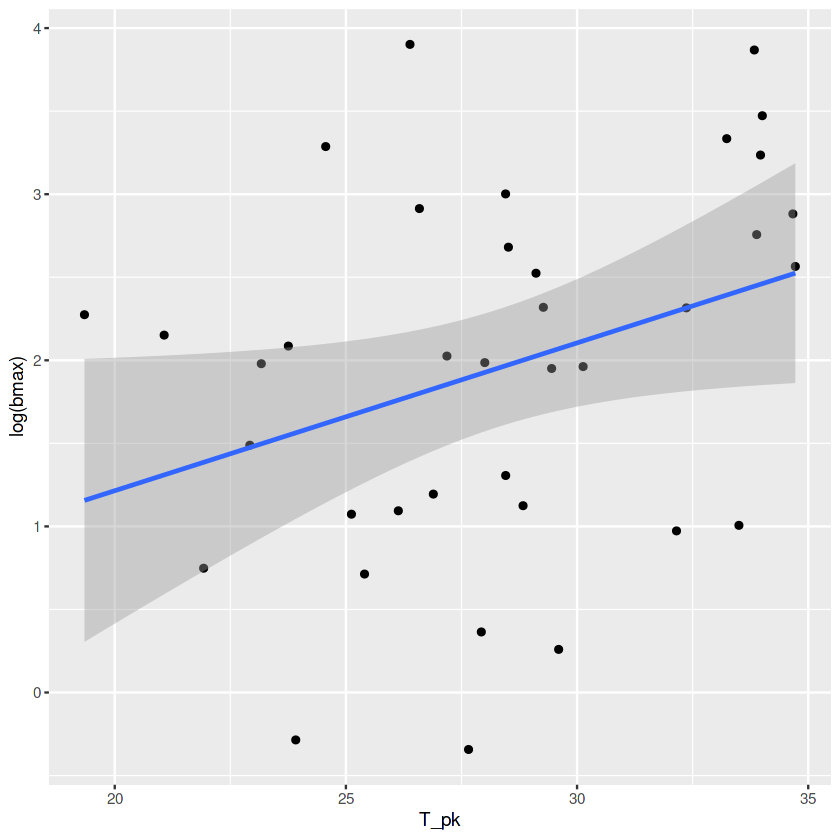

In [127]:
bmax_data %>%
  ggplot(aes(x=T_pk,y = log(bmax)))+
  geom_point()+
  geom_smooth(method = 'lm')

In [128]:
bmax_data <- as_tibble(read.csv('../data/bmaxT_pksMass.csv')) # load in data 
bmax_data$kT <- 1/(8.617333262145 * 10^-5 * (bmax_data$T_pk+273.15))
head(bmax_data)

bmax,bmaxLwr,bmaxUpr,species,curve_ID,T_pk,T_pkLwr,T_pkUpr,mass,kT
<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13.001684,9.058631,17.745706,Bemisia tabaci,10,34.721,34.39017,35.89390,0.293125,37.69279
3.079183,2.516640,3.659039,Tetraneura nigriabdominalis,11,28.832,27.93400,29.09806,0.867300,38.42785
7.114108,6.288937,9.107937,Stethorus punctillum,12,30.131,28.22967,30.91400,0.480000,38.26325
10.164576,8.953538,11.770883,Tetranychus mcdanieli,13,29.271,27.44185,30.99757,0.024300,38.37206
7.033624,6.348867,7.562313,Clavigralla tomentosicollis,15,29.450,28.58441,30.62154,50.495000,38.34937
8.050324,6.895361,9.632929,Planococcus citri,16,23.755,22.47320,28.26400,1.890000,39.08495


`geom_smooth()` using formula 'y ~ x'



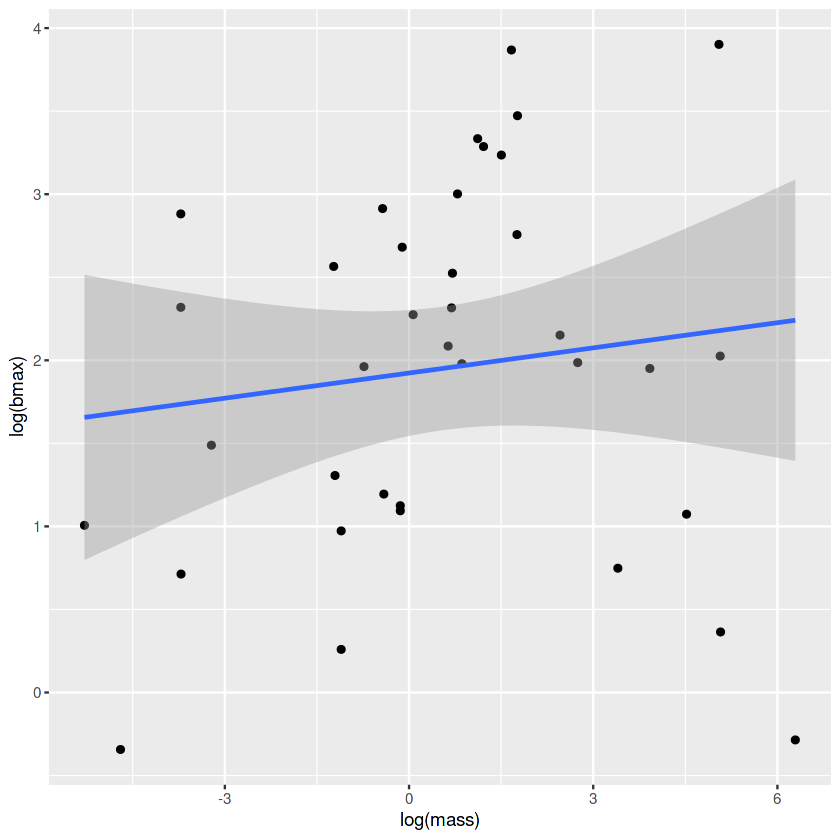

In [129]:
#plot uncorrected data in log-log scale
bmax_data %>%
  ggplot(aes(x=log(mass), y = log(bmax)))+
  geom_point()+
  geom_smooth(method = 'lm')

`geom_smooth()` using formula 'y ~ x'



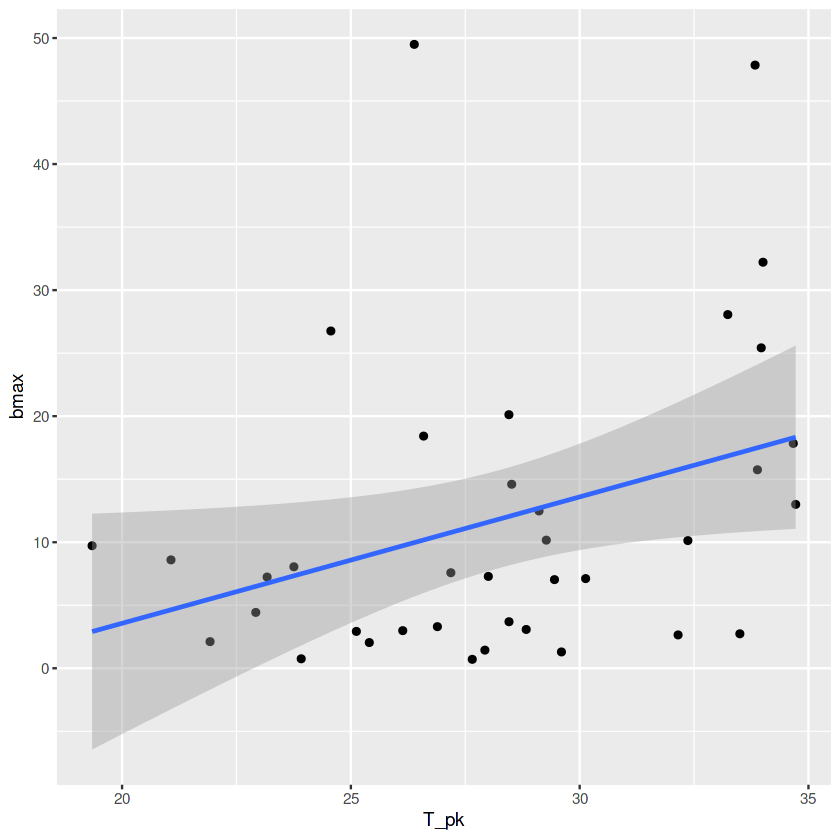

In [130]:
#plot b_pk vs T
bmax_data %>%
  ggplot(aes(x = T_pk, y = bmax)) +
  geom_point()+
  geom_smooth(method = 'lm')

In [131]:
# linear model (note the allometry is linear in log-log scale)
bmax_model <- lm(log(bmax) ~ log(mass) + kT, data = bmax_data)
summary(bmax_model)
coef(bmax_model)

save(bmax_model,file="../results/bmax_MTE_model.Rdata")

bmax_cf <-  confint(bmax_model,level = .95)
anova(bmax_model)


Call:
lm(formula = log(bmax) ~ log(mass) + kT, data = bmax_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2792 -0.5920  0.1207  0.7555  1.7582 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 32.34429   13.08257   2.472   0.0186 *
log(mass)    0.08421    0.06324   1.332   0.1918  
kT          -0.79051    0.33993  -2.326   0.0261 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.05 on 34 degrees of freedom
Multiple R-squared:  0.1517,	Adjusted R-squared:  0.1018 
F-statistic: 3.041 on 2 and 34 DF,  p-value: 0.06098


(Intercept)   log(mass)          kT 
32.34428582  0.08421395 -0.79051017

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(mass),1,0.7427634,0.7427634,0.6731692,0.41766424
kT,1,5.9671143,5.9671143,5.4080177,0.02614579
Residuals,34,37.5150184,1.1033829,NA,NA


`geom_smooth()` using formula 'y ~ x'



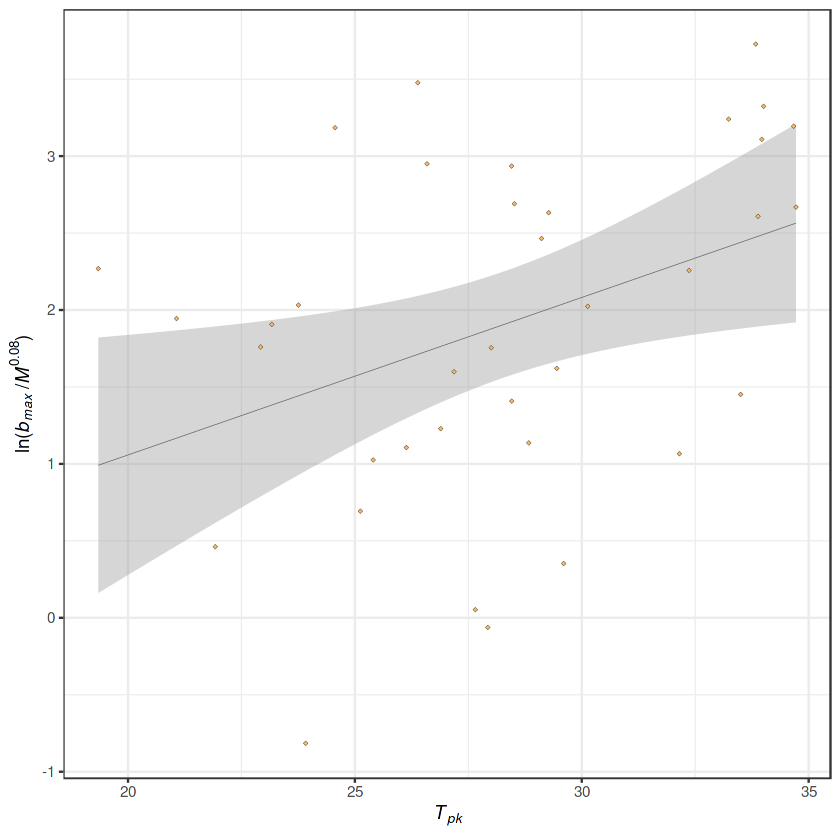

In [132]:
#plot a_pk in 1/kT, correcting for mass
MassCorrectedBmaxTpk <- 
  bmax_data %>%
  ggplot(aes(x = T_pk, y = log(bmax/mass^coef(bmax_model)[2]))) +
  geom_smooth(method = 'lm', colour = '#636363', size=0.15)+
  scale_y_continuous(expression(plain(paste("ln(", italic(b[max])~"/",italic(M^0.08),")"))))+
  scale_x_continuous(expression(plain(paste(italic("T"[pk])))))+  
  theme_bw()+
  geom_point(size = 1, col="#000000",stroke=0.1, shape = 23, fill="#fdb863")

MassCorrectedBmaxTpk

## Juvenile mortality rate ($z_j$)

In [133]:
#±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±

# 2. Juvenile mortality rate (z_j)

bodyMass <- as_tibble(read.csv('../data/sizeMeans.csv')) %>% 
  rename(species = interactor1) %>% 
  mutate(curve_ID = case_when(species == 'Thrips hawaiiensis' ~ '1',
                              species == 'Aedes aegypti' ~ '2',
                              species == 'Anthonomus grandis' ~ '3',
                              species == 'Paracoccus marginatus' ~ '4',
                              species == 'Acyrthosiphon pisum' ~ '5',
                              species == 'Aphis gossypii' ~ '6',
                              species == 'Harmonia axyridis' ~ '7',
                              species == 'Tribolium castaneum' ~ '8',
                              species == 'Tetranychus mcdanieli' ~ '9',
                              species == 'Bemisia tabaci' ~ '10',
                              species == 'Tetraneura nigriabdominalis' ~ '11',
                              species == 'Stethorus punctillum' ~ '12',
                              species == 'Tetranychus urticae' ~ '14',
                              species == 'Planococcus citri' ~ '16',
                              species == 'Muscidifurax zaraptor' ~ '17',
                              species == 'Aphis nasturtii' ~ '18',
                              species == 'Rhopalosiphum maidis' ~ '19',
                              species == 'Anopheles gambiae' ~ '20',
                              species == 'Anoplophora glabripennis' ~ '21',
                              species == 'Culex annulirostris' ~ '25',
                              species == 'Laricobius nigrinus' ~ '30',
                              species == 'Aubeonymus mariaefranciscae' ~ '31',
                              species == 'Helicoverpa armigera' ~ '37',
                              species == 'Halyomorpha halys' ~ '43',
                              species == 'Muscidifurax raptorellus' ~ '44',
                              species == 'Aedes albopictus' ~ '45')) %>%
  arrange(curve_ID) %>% 
  rename(massspecies = species, masscurve_ID = curve_ID) %>% 
  filter(masscurve_ID != 'NA')


In [134]:
zjPk <- as_tibble(read.csv('../data/zj_Tpks_AllParams.csv')) %>%
  mutate(curve_ID = case_when(species == 'Thrips hawaiiensis' ~ '1',
                              species == 'Aedes aegypti' ~ '2',
                              species == 'Anthonomus grandis' ~ '3',
                              species == 'Paracoccus marginatus' ~ '4',
                              species == 'Acyrthosiphon pisum' ~ '5',
                              species == 'Aphis gossypii' ~ '6',
                              species == 'Harmonia axyridis' ~ '7',
                              species == 'Tribolium castaneum' ~ '8',
                              species == 'Tetranychus mcdanieli' ~ '9',
                              species == 'Bemisia tabaci' ~ '10',
                              species == 'Tetraneura nigriabdominalis' ~ '11',
                              species == 'Stethorus punctillum' ~ '12',
                              species == 'Tetranychus urticae' ~ '14',
                              species == 'Planococcus citri' ~ '16',
                              species == 'Muscidifurax zaraptor' ~ '17',
                              species == 'Aphis nasturtii' ~ '18',
                              species == 'Rhopalosiphum maidis' ~ '19',
                              species == 'Anopheles gambiae' ~ '20',
                              species == 'Anoplophora glabripennis' ~ '21',
                              species == 'Culex annulirostris' ~ '25',
                              species == 'Laricobius nigrinus' ~ '30',
                              species == 'Aubeonymus mariaefranciscae' ~ '31',
                              species == 'Helicoverpa armigera' ~ '37',
                              species == 'Halyomorpha halys' ~ '43',
                              species == 'Muscidifurax raptorellus' ~ '44',
                              species == 'Aedes albopictus' ~ '45')) %>%
  arrange(curve_ID) 


Call:
lm(formula = log(zjpk) ~ T_pk, data = zj_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1784 -1.0390  0.3083  0.6994  1.6856 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.900254   0.751882  -6.517 9.69e-07 ***
T_pk        -0.004496   0.037997  -0.118    0.907    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.064 on 24 degrees of freedom
Multiple R-squared:  0.0005829,	Adjusted R-squared:  -0.04106 
F-statistic: 0.014 on 1 and 24 DF,  p-value: 0.9068


`geom_smooth()` using formula 'y ~ x'



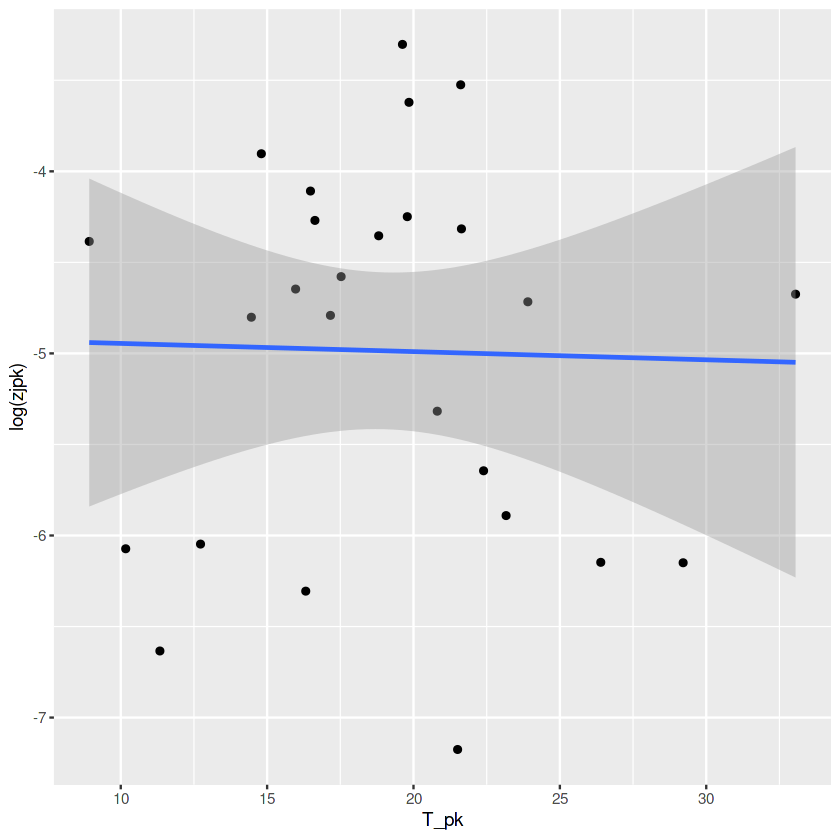

In [135]:
zj_pk <- zjPk %>% filter(param == 'rmax') %>% 
  rename(zjpk = estimate, zjpkLwr = conf_lower, zjpkUpr = conf_upper) %>% 
  select(zjpk, zjpkLwr, zjpkUpr, species, curve_ID) %>% mutate(zjpk = as.numeric(zjpk)) %>%
  mutate(zjpk = 1/zjpk, zjpkLwr = 1/zjpkLwr, zjpkUpr = 1/zjpkUpr)

T_pk <- zjPk %>% filter(param == 'topt') %>% 
  rename(T_pk = estimate, T_pkLwr = conf_lower,T_pkUpr = conf_upper) %>% 
  select(T_pk, T_pkLwr, T_pkUpr)

bodyMass <- bodyMass %>% select(avg, masscurve_ID)

zj_data <- bind_cols(zj_pk, T_pk, bodyMass)

zj_data <- zj_data %>% rename(mass = avg) %>% select(-masscurve_ID)

write_csv(zj_data, '../data/zj_pksT_pksMass.csv')

zj_model <- lm(log(zjpk) ~ T_pk, data = zj_data); summary(zj_model)

zj_data %>%
  ggplot(aes(x=T_pk,y = log(zjpk)))+
  geom_point()+
  geom_smooth(method = 'lm')

In [136]:
zj_data <- as_tibble(read.csv('../data/zj_pksT_pksMass.csv')) # load in data 
zj_data$kT <- 1/(8.617333262145 * 10^-5 * (zj_data$T_pk+273.15))
head(zj_data)

zjpk,zjpkLwr,zjpkUpr,species,curve_ID,T_pk,T_pkLwr,T_pkUpr,mass,kT
<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.029456767,0.031238658,0.027834009,Thrips hawaiiensis,1,21.612,20.998290,22.09138,0.040000,39.36911
0.012854225,0.014721921,0.010333996,Bemisia tabaci,10,18.811,17.064797,21.97133,0.293125,39.74681
0.009328338,0.012085413,0.008260627,Tetraneura nigriabdominalis,11,33.051,26.118200,33.32700,0.867300,37.89837
0.016435073,0.018553207,0.014854855,Stethorus punctillum,12,16.481,14.773070,17.93275,0.480000,40.06656
0.012463195,0.014308808,0.010743287,Tetranychus urticae,14,8.923,8.959364,9.50209,0.024300,41.14012
0.002364294,0.003185969,0.002197066,Planococcus citri,16,12.725,12.790348,15.42100,1.890000,40.59298


`geom_smooth()` using formula 'y ~ x'



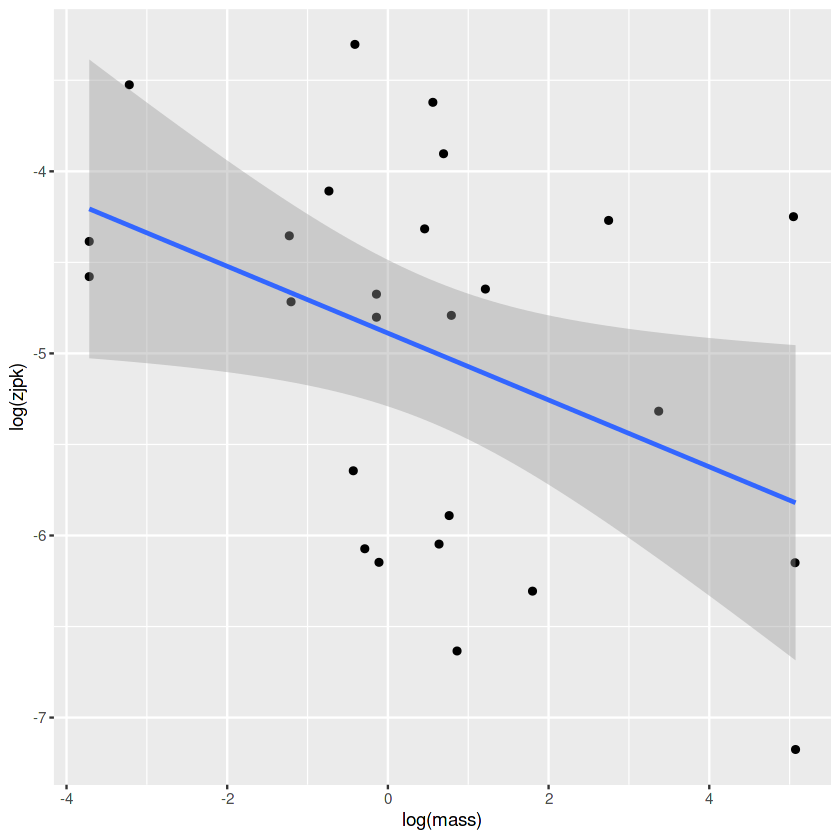

In [137]:
#plot uncorrected data in log-log scale
zj_data %>%
  ggplot(aes(x=log(mass), y = log(zjpk)))+
  geom_point()+
  geom_smooth(method = 'lm')

`geom_smooth()` using formula 'y ~ x'



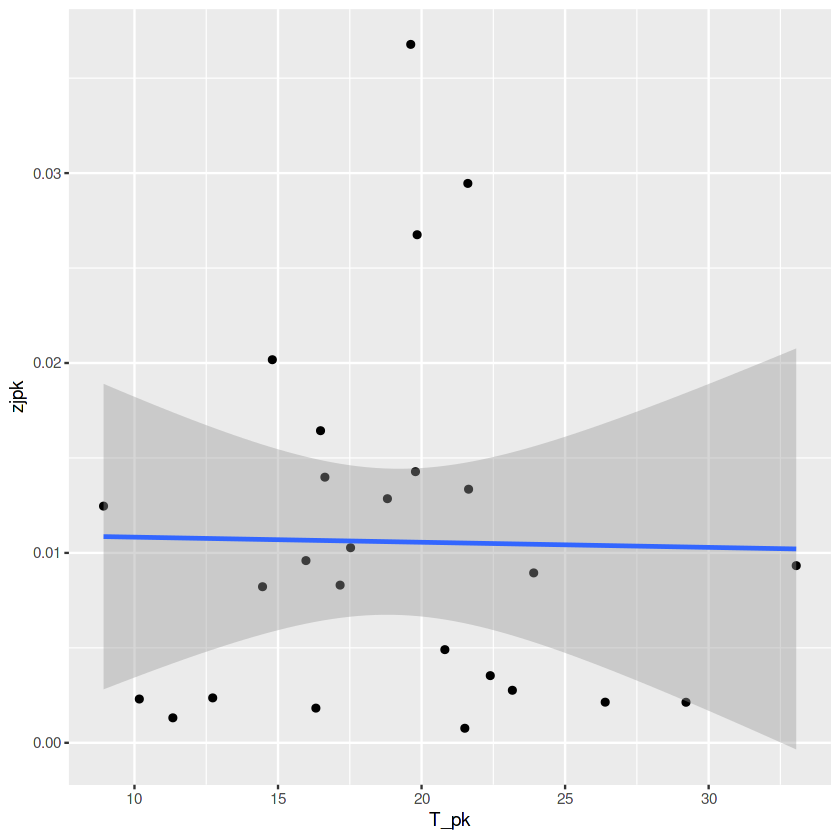

In [138]:
#plot zj_pk vs Tpk
zj_data %>%
  ggplot(aes(x = T_pk, y = zjpk)) +
  geom_point()+
  geom_smooth(method = 'lm')

In [139]:
# linear model (note the allometry is linear in log-log scale)
zj_model <- lm(log(zjpk) ~ log(mass) + kT, data = zj_data)
summary(zj_model)
coef(zj_model)

save(zj_model,file="../results/zj_MTE_model.Rdata")

b_cf <-  confint(zj_model,level = .95)
anova(zj_model)


Call:
lm(formula = log(zjpk) ~ log(mass) + kT, data = zj_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.45635 -0.92187  0.04431  0.65840  1.59456 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.07109   10.68056  -0.007   0.9947  
log(mass)   -0.19302    0.08624  -2.238   0.0352 *
kT          -0.12112    0.26848  -0.451   0.6561  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9851 on 23 degrees of freedom
Multiple R-squared:  0.1791,	Adjusted R-squared:  0.1077 
F-statistic: 2.509 on 2 and 23 DF,  p-value: 0.1034


(Intercept)   log(mass)          kT 
-0.07109039 -0.19302338 -0.12112295

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(mass),1,4.6717805,4.6717805,4.8146332,0.03858404
kT,1,0.1974918,0.1974918,0.2035306,0.65611086
Residuals,23,22.3175777,0.9703295,NA,NA


`geom_smooth()` using formula 'y ~ x'



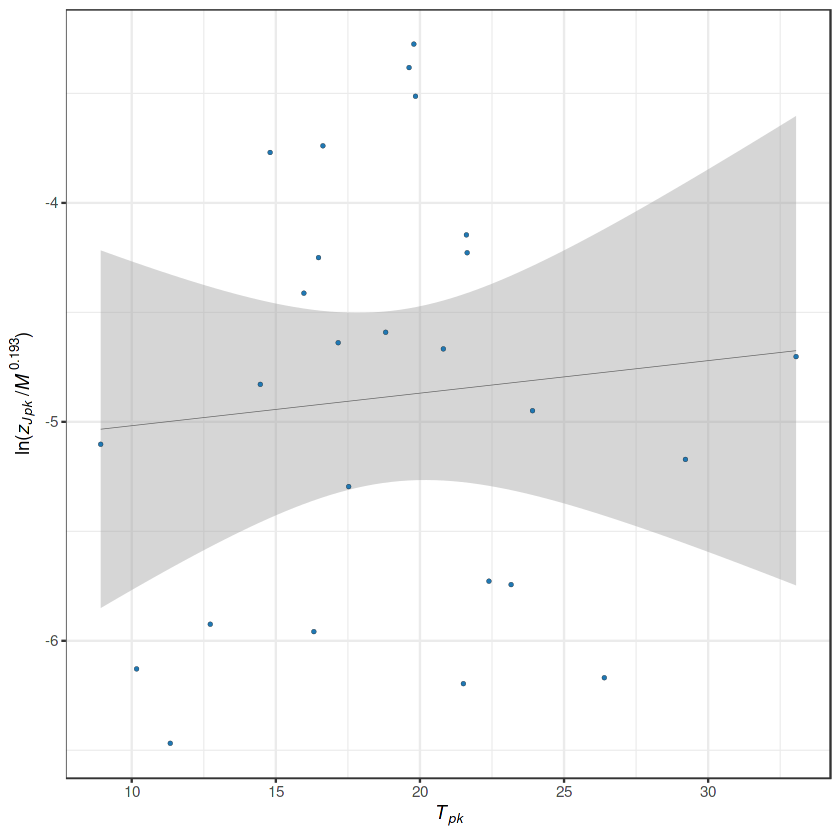

In [140]:
#plot a_pk in 1/kT, correcting for mass
MassCorrectedzjpkTpk <- 
  zj_data %>%
  ggplot(aes(x = T_pk, y = log(zjpk/mass^coef(zj_model)[2])))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.15)+
  scale_y_continuous(expression(plain(paste("ln(", italic(z[J][pk])~"/",italic(M^-0.193),")"))))+
  scale_x_continuous(expression(plain(paste(italic("T"[pk])))))+
  theme_bw()+
  geom_point(size = 1, col="#000000",stroke=0.1, shape = 21, fill="#1f78b4")

MassCorrectedzjpkTpk

## Adult mortality rate ($z$)

In [141]:
#==================================================================

# 3. Adult mortality rate (z)

bodyMass <- as_tibble(read.csv('../data/sizeMeans.csv')) %>% 
  rename(species = interactor1) %>% 
  mutate(curve_ID = case_when(species == 'Culex pipiens' ~ '1',
                              species == 'Plutella xylostella' ~ '2',
                              species == 'Thrips hawaiiensis' ~ '3',
                              species == 'Phenacoccus solenopsis' ~ '4',
                              species == 'Antestiopsis thunbergii' ~ '5',
                              species == 'Culex quinquefasciatus' ~ '6',
                              species == 'Halyomorpha halys' ~ '7',
                              species == 'Monochamus leuconotus' ~ '8',
                              species == 'Anthonomus grandis' ~ '9',
                              species == 'Paracoccus marginatus' ~ '10',
                              species == 'Acyrthosiphon pisum' ~ '11',
                              species == 'Aphis gossypii' ~ '12',
                              species == 'Tribolium castaneum' ~ '14',
                              species == 'Tetranychus mcdanieli' ~ '15',
                              species == 'Bemisia tabaci' ~ '16',
                              species == 'Tetraneura nigriabdominalis' ~ '17',
                              species == 'Stethorus punctillum' ~ '18',
                              species == 'Aedes krombeini' ~ '19',
                              species == 'Muscidifurax zaraptor' ~ '21',
                              species == 'Aphis nasturtii' ~ '22',
                              species == 'Rhopalosiphum maidis' ~ '23',
                              species == 'Anopheles gambiae' ~ '24',
                              species == 'Anoplophora glabripennis' ~ '25',
                              species == 'Helicoverpa armigera' ~ '26',
                              species == 'Aedes albopictus' ~ '27',
                              species == 'Trichogramma bruni' ~ '28',
                              species == 'Trichogramma sp. nr. Lutea' ~ '29',
                              species == 'Aedes aegypti' ~ '30')) %>%
  arrange(curve_ID) %>% 
  rename(massspecies = species, masscurve_ID = curve_ID) %>% 
  filter(masscurve_ID != 'NA')

In [142]:
zPk <- as_tibble(read.csv('../data/z_Tpks_AllParams.csv')) %>%
  mutate(curve_ID = case_when(species == 'Culex pipiens' ~ '1',
                              species == 'Plutella xylostella' ~ '2',
                              species == 'Thrips hawaiiensis' ~ '3',
                              species == 'Phenacoccus solenopsis' ~ '4',
                              species == 'Antestiopsis thunbergii' ~ '5',
                              species == 'Culex quinquefasciatus' ~ '6',
                              species == 'Halyomorpha halys' ~ '7',
                              species == 'Monochamus leuconotus' ~ '8',
                              species == 'Anthonomus grandis' ~ '9',
                              species == 'Paracoccus marginatus' ~ '10',
                              species == 'Acyrthosiphon pisum' ~ '11',
                              species == 'Aphis gossypii' ~ '12',
                              species == 'Tribolium castaneum' ~ '14',
                              species == 'Tetranychus mcdanieli' ~ '15',
                              species == 'Bemisia tabaci' ~ '16',
                              species == 'Tetraneura nigriabdominalis' ~ '17',
                              species == 'Stethorus punctillum' ~ '18',
                              species == 'Aedes krombeini' ~ '19',
                              species == 'Muscidifurax zaraptor' ~ '21',
                              species == 'Aphis nasturtii' ~ '22',
                              species == 'Rhopalosiphum maidis' ~ '23',
                              species == 'Anopheles gambiae' ~ '24',
                              species == 'Anoplophora glabripennis' ~ '25',
                              species == 'Helicoverpa armigera' ~ '26',
                              species == 'Aedes albopictus' ~ '27',
                              species == 'Trichogramma bruni' ~ '28',
                              species == 'Trichogramma sp. nr. Lutea' ~ '29',
                              species == 'Aedes aegypti' ~ '30')) %>%
  arrange(curve_ID) 


In [143]:
z_pk <- zPk %>% filter(param == 'rmax') %>% 
  rename(zpk = estimate, zpkLwr = conf_lower, zpkUpr = conf_upper) %>% 
  select(zpk, zpkLwr, zpkUpr, species, curve_ID) %>% 
  mutate(zpk = 1/zpk, zpkLwr = 1/zpkLwr, zpkUpr = 1/zpkUpr)

T_pk <- zPk %>% filter(param == 'topt') %>% 
  rename(T_pk = estimate, T_pkLwr = conf_lower,T_pkUpr = conf_upper) %>% 
  select(T_pk, T_pkLwr, T_pkUpr)

bodyMass <- bodyMass %>% select(avg, masscurve_ID)

z_data <- bind_cols(z_pk, T_pk, bodyMass)

z_data <- z_data %>% rename(mass = avg) %>% select(-masscurve_ID)

write_csv(z_data, '../data/z_pksT_pksMass.csv')


Call:
lm(formula = log(zpk) ~ T_pk, data = z_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.98927 -0.66533  0.06986  0.65591  1.54969 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.35453    0.69835  -4.803 5.65e-05 ***
T_pk        -0.03519    0.03827  -0.920    0.366    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9693 on 26 degrees of freedom
Multiple R-squared:  0.03149,	Adjusted R-squared:  -0.005755 
F-statistic: 0.8455 on 1 and 26 DF,  p-value: 0.3663


`geom_smooth()` using formula 'y ~ x'



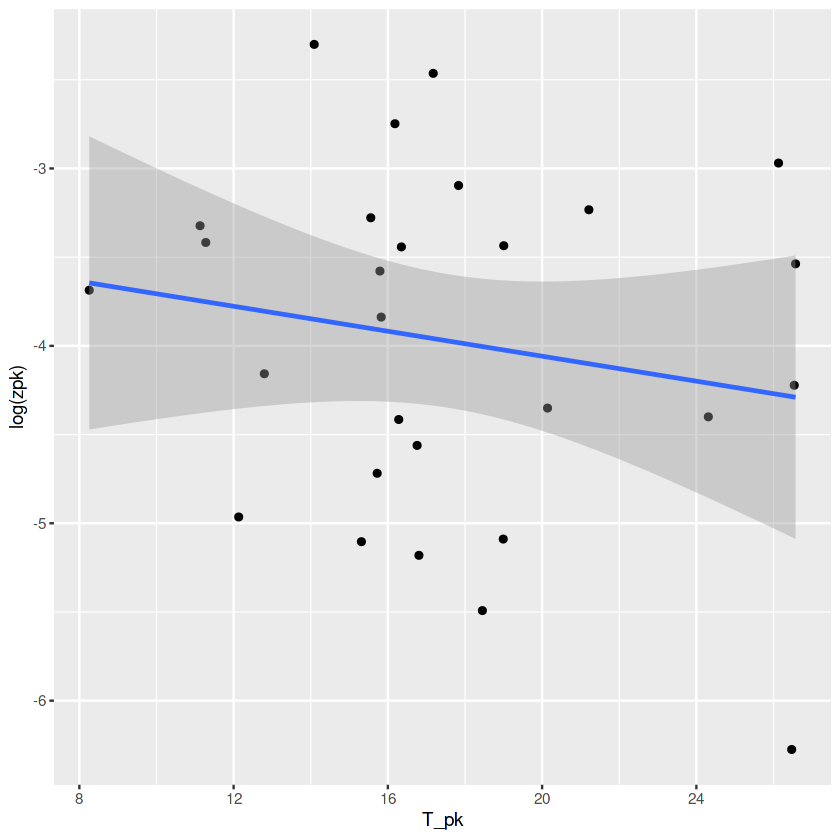

In [144]:
z_model <- lm(log(zpk) ~ T_pk, data = z_data); summary(z_model)

z_data %>%
  ggplot(aes(x=T_pk,y = log(zpk)))+
  geom_point()+
  geom_smooth(method = 'lm')

In [145]:
z_data <- as_tibble(read.csv('../data/z_pksT_pksMass.csv')) # load in data 
z_data$kT <- 1/(8.617333262145 * 10^-5 * (z_data$T_pk+273.15))
head(z_data)

zpk,zpkLwr,zpkUpr,species,curve_ID,T_pk,T_pkLwr,T_pkUpr,mass,kT
<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.005623539,0.007190672,0.004569232,Culex pipiens,1,16.806,16.703000,16.82689,2.9200000,40.02165
0.021540255,0.026632148,0.019482654,Paracoccus marginatus,10,15.827,15.591853,18.02400,3.3650000,40.15724
0.025069042,0.026740322,0.018844436,Acyrthosiphon pisum,11,8.256,5.706592,9.03638,2.3650000,41.23764
0.032803103,0.034015864,0.032444364,Aphis gossypii,12,11.278,11.095969,11.57499,0.6633333,40.79949
0.001882355,0.002164736,0.001628582,Tribolium castaneum,14,26.472,25.453984,26.96465,2.1437500,38.73053
0.027919601,0.030100235,0.026282198,Tetranychus mcdanieli,15,15.794,14.794687,17.03000,0.0243000,40.16182


`geom_smooth()` using formula 'y ~ x'



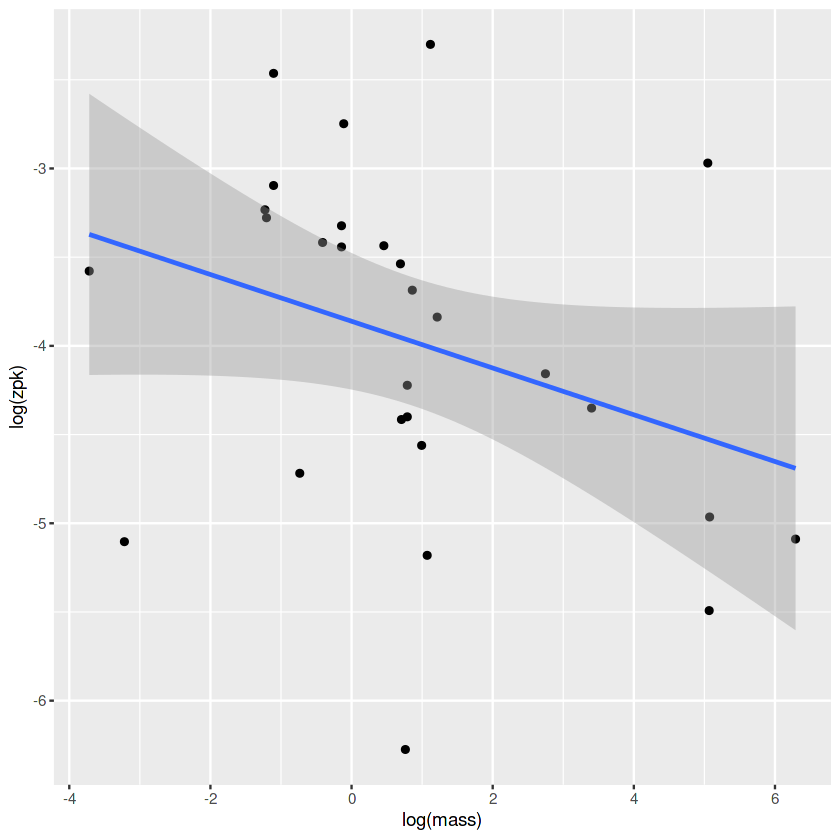

In [146]:
#plot uncorrected data in log-log scale
z_data %>%
  ggplot(aes(x=log(mass), y = log(zpk)))+
  geom_point()+
  geom_smooth(method = 'lm')

`geom_smooth()` using formula 'y ~ x'



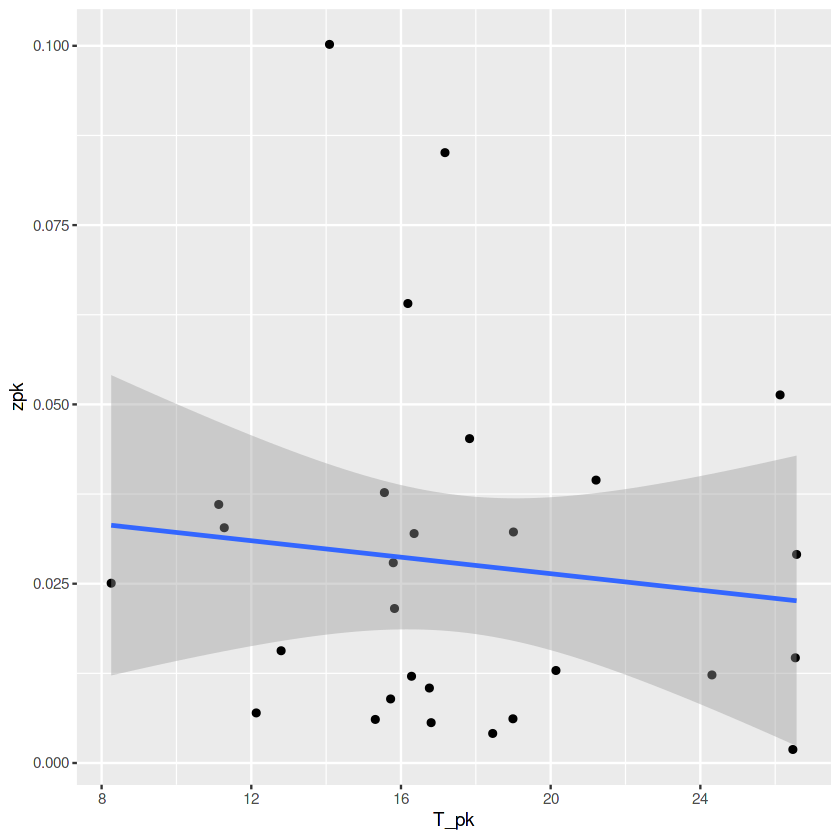

In [147]:
#plot z_pk vs Tpk
z_data %>%
  ggplot(aes(x = T_pk, y = zpk)) +
  geom_point()+
  geom_smooth(method = 'lm')

In [148]:
# linear model (note the allometry is linear in log-log scale)
z_model <- lm(log(zpk) ~ log(mass) + kT, data = z_data)
summary(z_model)
coef(z_model)

save(z_model,file="../results/z_MTE_model.Rdata")

z_cf <-  confint(z_model,level = .95)
anova(z_model)


Call:
lm(formula = log(zpk) ~ log(mass) + kT, data = z_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.08868 -0.51637  0.02289  0.53995  1.73792 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -11.37312   11.02617  -1.031    0.312
log(mass)    -0.12350    0.07678  -1.608    0.120
kT            0.18798    0.27590   0.681    0.502

Residual standard error: 0.941 on 25 degrees of freedom
Multiple R-squared:  0.1223,	Adjusted R-squared:  0.05212 
F-statistic: 1.742 on 2 and 25 DF,  p-value: 0.1957


(Intercept)   log(mass)          kT 
-11.3731218  -0.1234987   0.1879847

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(mass),1,2.6744707,2.6744707,3.0203207,0.09453224
kT,1,0.4110941,0.4110941,0.4642548,0.50190560
Residuals,25,22.1373071,0.8854923,NA,NA


`geom_smooth()` using formula 'y ~ x'



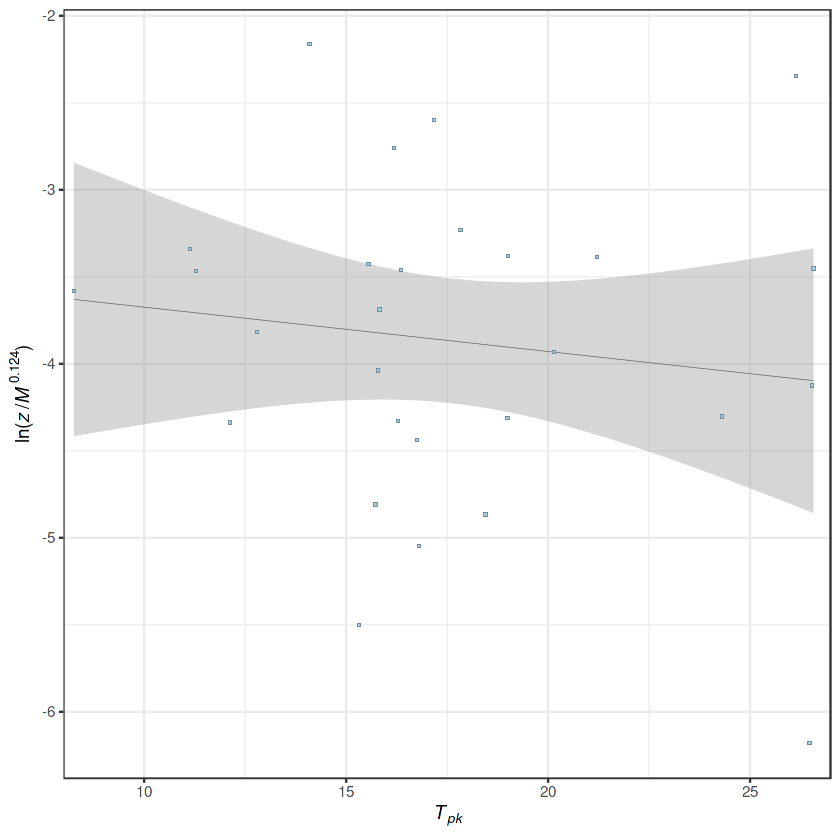

In [149]:
#plot a_pk in 1/kT, correcting for mass
MassCorrectedzpkTpk <- 
  z_data %>%
  ggplot(aes(x = T_pk, y = log(zpk/mass^coef(z_model)[2]))) +
  geom_smooth(method = 'lm', colour = '#636363', size=0.15)+
  scale_y_continuous(expression(plain(paste("ln(", italic(z)~"/",italic(M^-0.124),")"))))+
  scale_x_continuous(expression(plain(paste(italic("T"[pk])))),
                     limits=c(8,27),
                     expand = c(0, 0),
                     breaks=seq(10,25, by=5))+  
  theme_bw()+
  geom_point(size = 1, col="#000000",stroke=0.1, shape = 22, fill="#a6cee3")

MassCorrectedzpkTpk

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



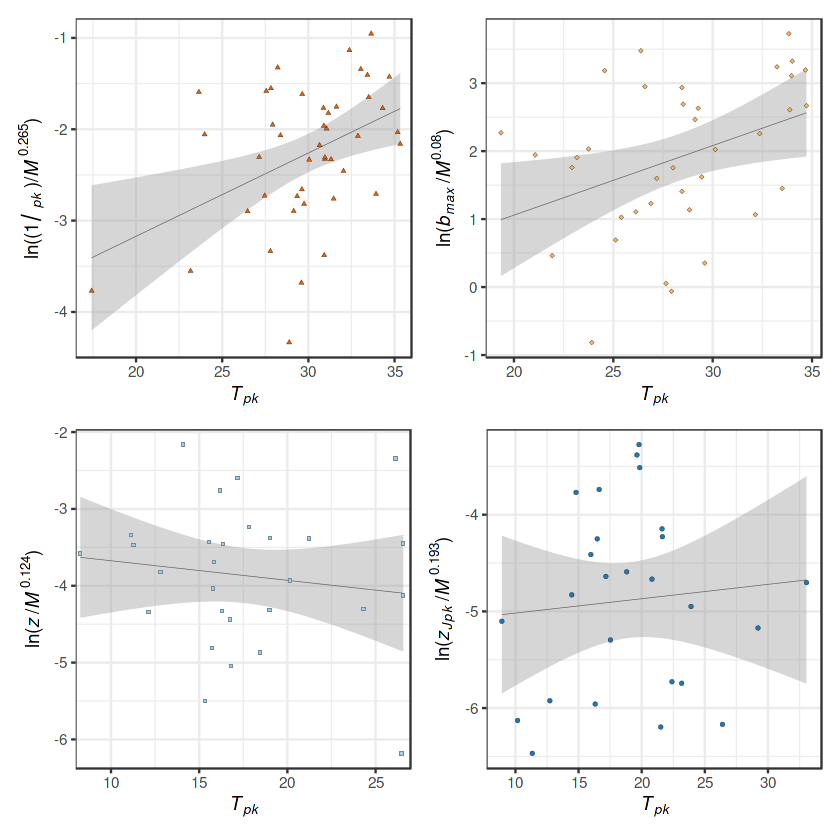

In [151]:
#========= plot hotter-is-better panel 

p1 <- (MassCorrectedApkTpk+MassCorrectedBmaxTpk)/(MassCorrectedzpkTpk+MassCorrectedzjpkTpk); p1

save_plot(p1, file="../results/Figs/Traits_HotterIsBetter.pdf", 
          base_height=10,base_width = 12, base_asp = 0.75,units="cm")